This script generates Democratic and Republican primary linear regression models, tested on both the 2018 senate and governor's primaries.

In [54]:
#Import packages
import pandas as pd
import re
import matplotlib.pyplot as plt
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestRegressor
pd.options.mode.chained_assignment = None 
import numpy as np
from sklearn import metrics
from matplotlib import pyplot
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [55]:
#Read in data 
turnout_train_rep = pd.read_csv("turnout_train_rep.csv")
turnout_train_dem = pd.read_csv("turnout_train_dem.csv")



Training R^2:  0.7061535869014124
Mean Absolute Error (MAE): 4.105405498887172
Mean Squared Error (MSE): 33.17195850128981
Testing R^2:  0.6385839684845644


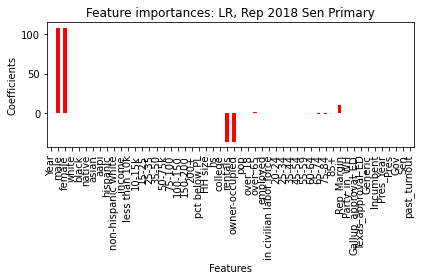

In [56]:
#Test: Create Linear Regression Republican Model: 2018 Senate
turnout_train_rep_mod = turnout_train_rep

np.random.seed(5)

#Remove test data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2018]

#Extract features
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0','County', 'Election', 'Turnout','Party','Runoff', 'Type'], axis = 1)

#Extract outcome
model_outcome = turnout_train_rep_mod['Turnout']
#Create model
reg = LinearRegression().fit(model_feats, model_outcome)
#print r^2
print("Training R^2: ",reg.score(model_feats, model_outcome))


#Test model
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Sen']
#Drop columns
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

#Specify outcome
model_outcome = turnout_train_rep_mod['Turnout']
#Make predictions
pred = reg.predict(model_feats)



#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



print("Testing R^2: ",reg.score(model_feats, model_outcome))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: LR, Rep 2018 Sen Primary")
plt.ylabel("Coefficients")
plt.xlabel("Features")
fig.tight_layout()


Training R^2:  0.7061535869014033
Mean Absolute Error (MAE): 4.213160279192213
Mean Squared Error (MSE): 33.111329232271856
Testing R^2:  0.6400134675840862


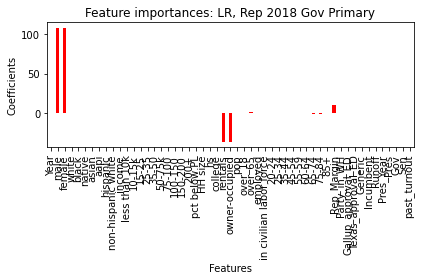

In [57]:
# Test: Create Linear Regression Republican Model: 2018 Gov
turnout_train_rep_mod = turnout_train_rep

np.random.seed(5)
#Remove test data
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Year'] != 2018]

#Extract features
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0','County', 'Election', 'Turnout','Party', 'Type'], axis = 1)

#Extract outcome
model_outcome = turnout_train_rep_mod['Turnout']
#Create model
reg = LinearRegression().fit(model_feats, model_outcome)
#print r^2
print("Training R^2: ",reg.score(model_feats, model_outcome))


#Test model
turnout_train_rep_mod = turnout_train_rep
#Specify election
turnout_train_rep_mod = turnout_train_rep_mod[turnout_train_rep_mod['Election'] == '2018_Rep_Gov']

#Drop columns
model_feats = turnout_train_rep_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)

#Specify outcome
model_outcome = turnout_train_rep_mod['Turnout']
#Make predictions
pred = reg.predict(model_feats)

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



print("Testing R^2: ",reg.score(model_feats, model_outcome))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(color = 'red')
plt.title("Feature importances: LR, Rep 2018 Gov Primary")
plt.ylabel("Coefficients")
plt.xlabel("Features")
fig.tight_layout()




Training R^2:  0.765585562213051
Mean Absolute Error (MAE): 17.672843020152953
Mean Squared Error (MSE): 368.84814273484767
Testing R^2:  -2.0870346253462735


Text(0.5, 0, 'Features')

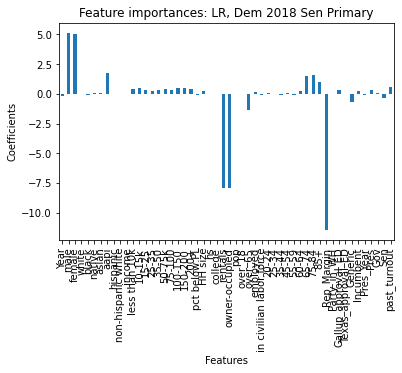

In [58]:
#Test: Create Linear Regression Democrat Model: 2018 Senate
turnout_train_dem_mod = turnout_train_dem

np.random.seed(5)

#Remove test data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2018]
#Extract features
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0','County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)

#Extract outcome
model_outcome = turnout_train_dem_mod['Turnout']
#Create model
reg = LinearRegression().fit(model_feats, model_outcome)
#print r^2
print('Training R^2: ', reg.score(model_feats, model_outcome))


#Test model
turnout_train_dem_mod = turnout_train_dem
#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Sen']
#Drop columns
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type', 'Runoff'], axis = 1)


#Specify outcome
model_outcome = turnout_train_dem_mod['Turnout']

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))


pred = reg.predict(model_feats)
print("Testing R^2: ",reg.score(model_feats, model_outcome))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: LR, Dem 2018 Sen Primary")
plt.ylabel("Coefficients")
plt.xlabel("Features")



Training R^2:  0.7655855622130516
Mean Absolute Error (MAE): 10.148163404490406
Mean Squared Error (MSE): 114.15189555045065
Testing R^2:  -2.187301300617772


Text(0.5, 0, 'Features')

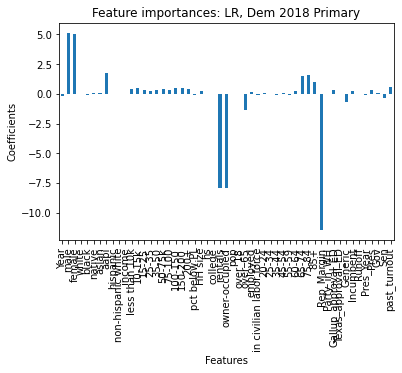

In [59]:
#Test: Create Regression Democrat Model: 2018 Governor
turnout_train_dem_mod = turnout_train_dem

np.random.seed(5)
#Remove test data
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Year'] != 2018]
#Extract features
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'Unnamed: 0','County', 'Election', 'Turnout','Party', 'Type'], axis = 1)

#Extract outcome
model_outcome = turnout_train_dem_mod['Turnout']
#Create model
reg = LinearRegression().fit(model_feats, model_outcome)
#print r^2
print("Training R^2: ", reg.score(model_feats, model_outcome))


#Test model
turnout_train_dem_mod = turnout_train_dem
#Specify election
turnout_train_dem_mod = turnout_train_dem_mod[turnout_train_dem_mod['Election'] == '2018_Dem_Gov']
#Drop columns
model_feats = turnout_train_dem_mod.drop(['Unnamed: 0','Unnamed: 0.1', 'County', 'Election', 'Turnout','Party', 'Type'], axis = 1)


#Specify outcome
model_outcome = turnout_train_dem_mod['Turnout']
#Make predictions
pred = reg.predict(model_feats)

#Print error
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(model_outcome, pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(model_outcome, pred))



print("Testing R^2: ",reg.score(model_feats, model_outcome))


#Show Importances
importances = reg.coef_

forest_importances = pd.Series(importances, index=model_feats.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar()
plt.title("Feature importances: LR, Dem 2018 Primary")
plt.ylabel("Coefficients")
plt.xlabel("Features")
